In [2]:
from emotion_usage_analysis import investigate_emotion
import matplotlib.pyplot as plt
import random as rd

/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '93.86%'")
  result = self._query(query)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '62.20%'")
  result = self._query(query)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '99.61%'")
  result = self._query(query)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '77.05%'")
  result = self._query(query)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '92.70%'")
  result = self._query(query)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '57.42%'")
  result =

# 0. Prelude

Here we use `busanjin` data (change `busanjin` to `Gimpo` to get the results of `Gimpo` users).

In [3]:
busanjin_emotion = investigate_emotion('busanjin')

/Users/sewookoh/GoogleDrive/My Drive/DataProject/ChatbotTeam/DataAnalysis/Modules/Emotion/emotion_usage_analysis.py:55: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  self.region_emotion_df = emotion_df[(emotion_df.SORT == self.region) &                                            (emotion_df.REGISTRATION_DATE > datetime.date(2019, 12, 1))]


# 1. Emotion stat

## 1.1 One user

Specify `period` argument to determine the period at which the data are aggregated

#### Example 1: By date

/Users/sewookoh/GoogleDrive/My Drive/DataProject/ChatbotTeam/DataAnalysis/Modules/Emotion/emotion_usage_analysis.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_specific_data[period] = user_specific_data.REGISTRATION_DATE.dt.floor(period)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


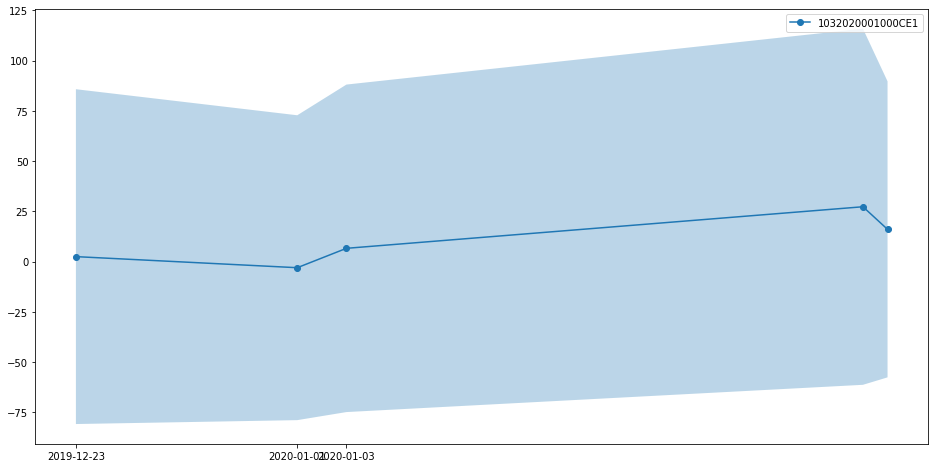

In [4]:
plt.figure(figsize=(16, 8))
random_user_plot = busanjin_emotion.userEmotionScore(rd.choice(busanjin_emotion.user_list), legend=True)

#### Example 2: By hour

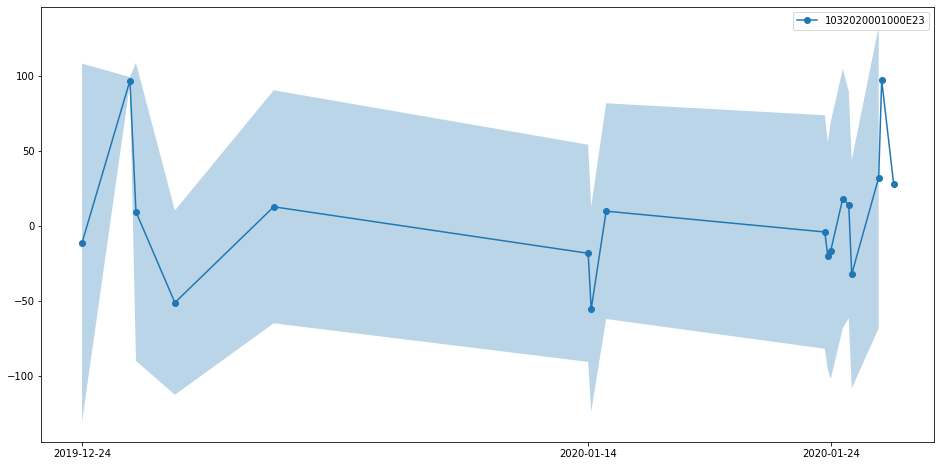

In [7]:
plt.figure(figsize=(16, 8))
random_user_plot = busanjin_emotion.userEmotionScore(rd.choice(busanjin_emotion.user_list), period='3H', legend=True)

#### Example 3: By 3 hours

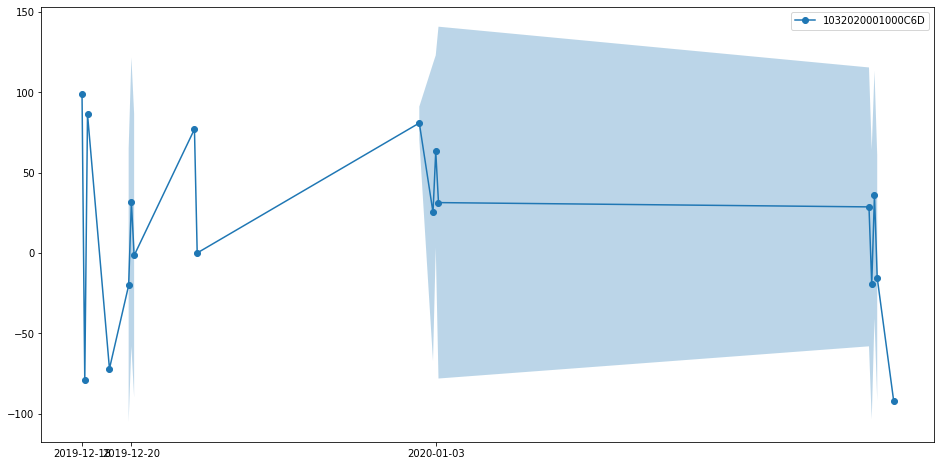

In [15]:
plt.figure(figsize=(16, 8))
random_user_plot = busanjin_emotion.userEmotionScore(rd.choice(busanjin_emotion.user_list), period='3H', legend=True)

## 1.2 All users (draw all individiual plots)

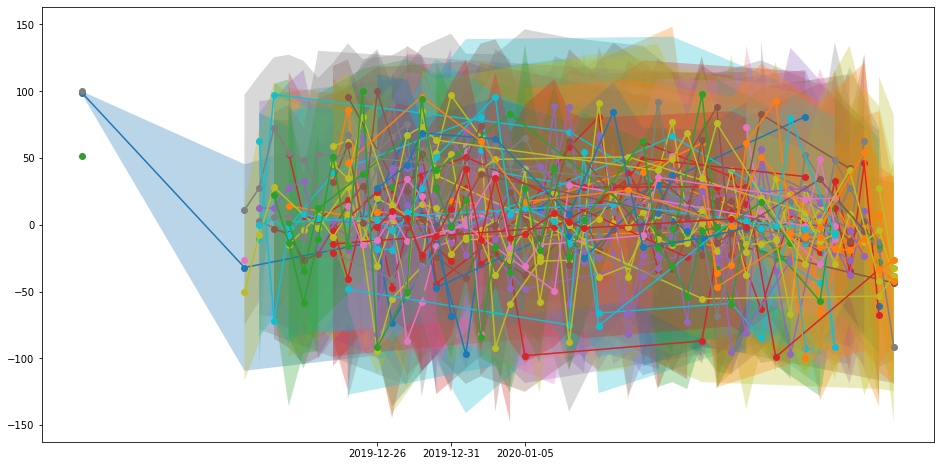

In [5]:
plt.figure(figsize=(16, 8))
for user in busanjin_emotion.user_list:
    random_user_plot = busanjin_emotion.userEmotionScore(user)

## 1.3 All users (aggregate)

/Users/sewookoh/GoogleDrive/My Drive/DataProject/ChatbotTeam/DataAnalysis/Modules/Busan/emotion_usage_analysis.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data[period] = total_data.REGISTRATION_DATE.dt.floor(period)


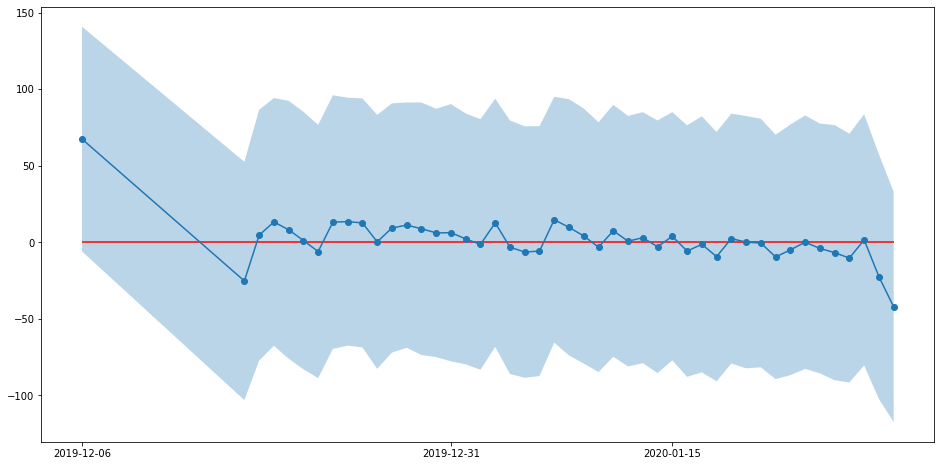

In [6]:
period = '24H'
plt.figure(figsize=(16, 8))
busanjin_emotion.totalEmotionScore(period=period)
plt.hlines(y=0, xmin=busanjin_emotion.region_emotion_df[period].iloc[0],
         xmax=busanjin_emotion.region_emotion_df[period].iloc[-1], color="red")

# 2. Usage stat

## 2.1 One user

/Users/sewookoh/GoogleDrive/My Drive/DataProject/ChatbotTeam/DataAnalysis/Modules/Busan/emotion_usage_analysis.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_specific_data['date'] = user_specific_data.REGISTRATION_DATE.map(lambda x: x.date())


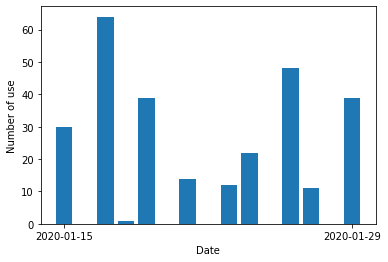

In [7]:
busanjin_emotion.userFrequency(rd.choice(busanjin_emotion.user_list))

## 2.2 All users (all individual plots)

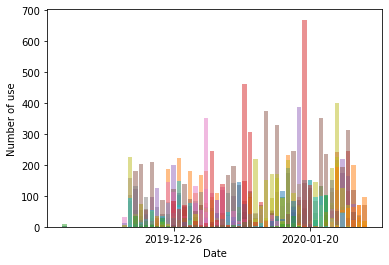

In [8]:
for user in busanjin_emotion.user_list:
    busanjin_emotion.userFrequency(user, alpha=0.5)

## 2.3 All users (accumulate)

/Users/sewookoh/GoogleDrive/My Drive/DataProject/ChatbotTeam/DataAnalysis/Modules/Busan/emotion_usage_analysis.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data['date'] = total_data.REGISTRATION_DATE.map(lambda x: x.date())


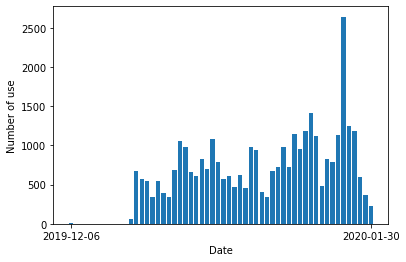

In [9]:
busanjin_emotion.totalFrequency()

## 2.4 All users (normalized by the number of people)

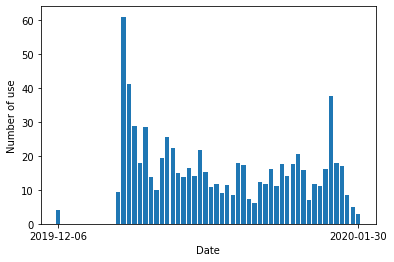

In [10]:
busanjin_emotion.totalFrequency(normalize_by_people=True)